# 直方图规定化
61518407 李浩瑞 完成于2020.3.28


- 先对原、目标图像直方图均衡化
$$S=T(r)=\int_{0}^{r} P_{r}(r) d r$$
$$V=G(Z)=\int_{0}^{x} p_{z}(z) d z$$
  - 离散形式
  $$\begin{aligned}
&\begin{aligned}
S_{k} &=T\left(r_{k}\right)=\sum_{j=0}^{k} P_{r}\left(r_{j}\right) \\
&=\sum_{j=0}^{k} \frac{n_{j}}{n} \quad k=0,1, \cdots, L-1
\end{aligned}
\end{aligned}$$
- 进行匹配
$$v_{k}=G\left(z_{k}\right)=\sum_{i=0}^{k} P_{z}\left(z_{i}\right)=s_{k} \quad k=0,1,2 \cdots L-1$$
  - 近似处理：寻找与下式最接近的$z_{k}$即可
  $$G\left(z_{k}\right)-s_{k}=0$$

In [1]:
import cv2 #opencv读取的格式是BGR
import numpy as np
import matplotlib.pyplot as plt#Matplotlib是RGB

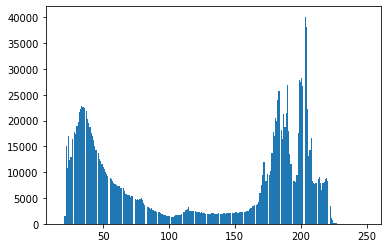

In [2]:
#展示我的灰度
img_me = cv2.imread('me.jpg',0) #0表示灰度图
hist = cv2.calcHist([img_me],[0],None,[256],[0,256])
plt.hist(img_me.ravel(),256); 
plt.show()

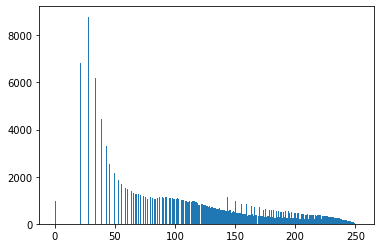

In [3]:
#展示梵高星空的灰度
img_starnight = cv2.imread('starnight.png',0) #0表示灰度图
hist = cv2.calcHist([img_me],[0],None,[256],[0,256])
plt.hist(img_starnight.ravel(),256); 
plt.show()

In [4]:
##Histogram equalization
def equalization(img,hist,num,eq_hist):
    '''
    This function can do the equalization and return the statics.
    Notice: hist,num,eq_hist should be list()
    '''
    for i in range(256):
        hist.append(0)
    row,col=img.shape
    for i in range(row):
        for j in range(col):
            hist[img[i,j]]= hist[img[i,j]]+1#统计灰度值的个数
    num.append(hist[0]/img.size)
    for i in range(0,255):
        num.append(num[i]+hist[i+1]/img.size)
    for i in range(256):
        eq_hist.append(round(255*num[i]))

In [5]:
#Histogram specification (matching)
def  specification(imag_row,imag_tar,save_name):
    '''
    This function can do the equalization and specification from imag_row to imag_tar.
    After the operater, shifted image will be saved as 'save_name.png'  
    '''
    #原图像均衡化
    Hist1=[]
    Num1=[]
    eq_Hist1=[]
    equalization(imag_row,Hist1,Num1,eq_Hist1)
        
    #目标图像均衡化
    Hist2=[]
    Num2=[]
    eq_Hist2=[]
    equalization(imag_tar,Hist2,Num2,eq_Hist2)
    
    g=[]#用于放入规定化后的图片像素
    for i in range(256):
        a=eq_Hist1[i]
        minp=255
        for j in range(256):
            b=abs(eq_Hist2[j]-a)
            if b<minp:                
                minp=b
                jmin=j
        g.append(jmin)
    for i in range(imag_row.shape[0]):#imag_row.shape[0]为行数
        for j in range(imag_row.shape[1]):#imag_row.shape[1]为列数
            imag_row[i,j]=g[imag_row[i,j]]
    #判断是否写入成功
    if(cv2.imwrite('{}.png'.format(save_name), imag_row)):
        print("Successfully saved {}.png".format(save_name))

In [6]:
specification(img_me,img_starnight,'shifted')

Successfully saved shifted.png


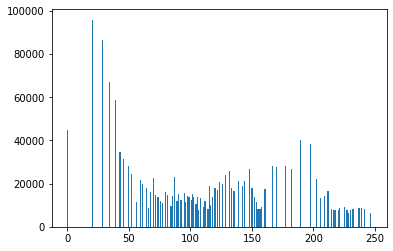

In [7]:
#展示改变后的灰度
img_shifted = cv2.imread('shifted.png')
hist = cv2.calcHist([img_shifted],[0],None,[256],[0,256])
plt.hist(img_me.ravel(),256); 
plt.show()